In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toxic-comment/toxic_test.csv
/kaggle/input/toxic-comment/toxic_train.csv
/kaggle/input/toxic-comment/toxic_test_labels.csv


# Process of solving nlp task ---
preprocessing -
tokenization-word tokenixation
noralization-stemmization,lemmatization
vectorixation-bag of words(count vector,tf-idf)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('/kaggle/input/toxic-comment/toxic_train.csv')

In [4]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


No issing value are there..

In [6]:
#check duplicate---
train_df.duplicated().sum()

0

In [7]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


toxic>obscene>insult>severe_toxic>identity_hate

so,I want to mearge tpxoc+obscene->1 and insult+severe_toxic+identity_hate->0

In [8]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


<AxesSubplot:>

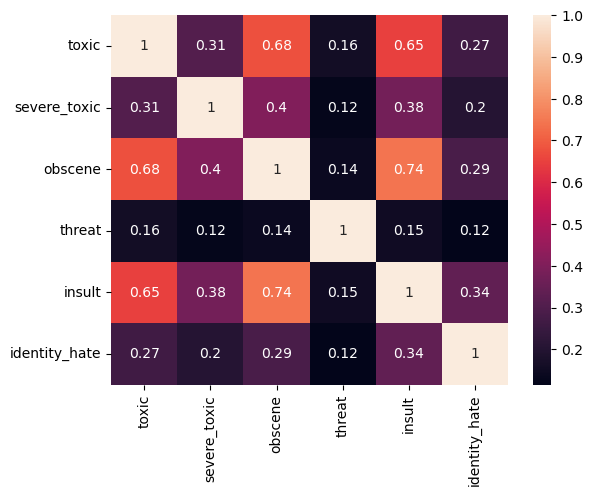

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
sns.heatmap(train_df.corr(),annot=True)

feature like insult vs toxic , obscene vs toxic, obscene vs insult is highly correlated

In [10]:

toxic= ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
for i in toxic:
    print(i)
    print(train_df[i].value_counts())

toxic
0    144277
1     15294
Name: toxic, dtype: int64
severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64
obscene
0    151122
1      8449
Name: obscene, dtype: int64
threat
0    159093
1       478
Name: threat, dtype: int64
insult
0    151694
1      7877
Name: insult, dtype: int64
identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64


# Preprocessing of text

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
import nltk

In [12]:

stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wnl = nltk.WordNetLemmatizer()

In [13]:
len(train_df)

159571

In [14]:
import sys
sys.setrecursionlimit(len(train_df))
def punch(text):
    text = text.replace("\n", " ")
    text = "".join([word for word in text if word not in string.punctuation])
    text = text.lower()
    return text

In [15]:
train_df['clean_text'] = train_df['comment_text'].apply(lambda x:punch(x))

In [16]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour im seem...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really not trying to edit war its j...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i cant make any real suggestions on impr...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...


In [17]:
cd '/usr/share/nltk_data/corpora/'

/usr/share/nltk_data/corpora


In [18]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: wordnet/
  inflating: wordnet/lexnames        
  inflating: wordnet/data.verb       
  inflating: wordnet/index.adv       
  inflating: wordnet/adv.exc         
  inflating: wordnet/index.verb      
  inflating: wordnet/cntlist.rev     
  inflating: wordnet/data.adj        
  inflating: wordnet/index.adj       
  inflating: wordnet/LICENSE         
  inflating: wordnet/citation.bib    
  inflating: wordnet/noun.exc        
  inflating: wordnet/verb.exc        
  inflating: wordnet/README          
  inflating: wordnet/index.sense     
  inflating: wordnet/data.noun       
  inflating: wordnet/data.adv        
  inflating: wordnet/index.noun      
  inflating: wordnet/adj.exc         


In [19]:
cd '/kaggle/working/'

/kaggle/working


In [20]:
import sys
sys.setrecursionlimit(len(train_df))
corpus = []
for i in range(0,len(train_df)):
    text = re.sub('[^a-zA_Z]',' ',train_df['clean_text'][i])
    text = text.lower()
    text = text.split()
    
    text = [wnl.lemmatize(word,pos='v') for word in text if word not in stopword]
    text = " ".join(text)
    corpus.append(text)

In [21]:
corpus[:2]

['explanation edit make username hardcore metallica fan revert werent vandalisms closure gas vote new york dolls fac please dont remove template talk page since im retire',
 'daww match background colour im seemingly stick thank talk january utc']

In [22]:
cv1 =CountVectorizer(max_features=4000)
bow = cv1.fit_transform(corpus).toarray()

In [23]:
print(bow.shape)

(159571, 4000)


In [24]:
bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
y  = np.array(train_df['toxic'])
y


array([0, 0, 0, ..., 0, 0, 0])

In [26]:
print(bow.shape)
print(y.shape)

(159571, 4000)
(159571,)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow,y,test_size=0.30,random_state=0000)

In [28]:
x_train.shape,y_train.shape

((111699, 4000), (111699,))

In [29]:
x_test.shape,y_test.shape

((47872, 4000), (47872,))

In [30]:
sentient_detection_model = MultinomialNB()
model = sentient_detection_model.fit(x_train,y_train)
y_pred = model.predict(x_test)
score = metrics.accuracy_score(y_test,y_pred)
print(score)
print(metrics.confusion_matrix(y_test,y_pred))

0.9489889705882353
[[42319   962]
 [ 1480  3111]]


In [31]:
a=x_test[1:2]
b=x_test[:1]

In [32]:
y_test[:2]

array([0, 1])

In [33]:
a,b

(array([[0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0]]))

In [34]:
print(model.predict(a))
print(model.predict(b))

[1]
[0]


-----------------------------------------------------------------------------------------

# using Word embedding and Lstm model

In [35]:
corpus[:2]

['explanation edit make username hardcore metallica fan revert werent vandalisms closure gas vote new york dolls fac please dont remove template talk page since im retire',
 'daww match background colour im seemingly stick thank talk january utc']

### Loading important libraries

In [36]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [37]:
#one_hot representation ---
voc_size = 10000
one_hot_rep = [one_hot(word,voc_size) for word in corpus]
one_hot_rep[:5]

[[8723,
  5652,
  9670,
  9121,
  6516,
  4312,
  4815,
  9827,
  4660,
  9734,
  26,
  6706,
  7926,
  4741,
  590,
  6271,
  8998,
  1638,
  7061,
  9479,
  9666,
  9154,
  2273,
  4467,
  3165,
  8886],
 [3213, 565, 2799, 6803, 3165, 3058, 3853, 705, 9154, 2983, 5085],
 [4545,
  9465,
  3165,
  7356,
  4507,
  5652,
  8874,
  7243,
  2386,
  9479,
  6332,
  2861,
  9154,
  5652,
  968,
  9154,
  2273,
  8289,
  2633,
  5773,
  5657,
  1219],
 [5089,
  9670,
  9998,
  164,
  6992,
  1999,
  1049,
  2771,
  8502,
  4981,
  2894,
  4549,
  7536,
  5270,
  3474,
  439,
  6992,
  742,
  5773,
  795,
  2625,
  5773,
  9308,
  8502,
  3508,
  5810,
  485,
  9699,
  5773,
  6944,
  5270,
  9344,
  1638,
  995,
  6024,
  456,
  8131,
  8131,
  9739,
  6905,
  3474,
  1209,
  3405,
  4940,
  977,
  6332,
  9561,
  4567,
  6965],
 [9308, 9456, 291, 9905, 2273, 1074]]

In [38]:
#padding of sentences 
sent_length =50
pad_sent = pad_sequences(one_hot_rep,padding='pre',maxlen=sent_length)

In [39]:
pad_sent[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 8723, 5652, 9670, 9121, 6516, 4312, 4815, 9827, 4660,
        9734,   26, 6706, 7926, 4741,  590, 6271, 8998, 1638, 7061, 9479,
        9666, 9154, 2273, 4467, 3165, 8886],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 3213,  565, 2799, 6803, 3165,
        3058, 3853,  705, 9154, 2983, 5085],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 4545, 9465, 3165, 7356, 4507,
        5652, 8874, 7243, 2386, 9479, 6332, 2861, 9154, 5652,  968, 9154,
        2273, 8289, 26

In [40]:
#word embedding----
model = Sequential()
model.add(Embedding(voc_size,40,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 40)            400000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________


Splitting  of data

In [42]:
x_train,x_test,y_train,y_test = train_test_split(pad_sent,y,test_size=0.30,random_state=42)

In [43]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
x_train.shape,y_train.shape

((111699, 50), (111699,))

In [45]:
x_test.shape,y_test.shape

((47872, 50), (47872,))

In [46]:
#fitting model
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
1746/1746 [==============================] - 135s 75ms/step - loss: 0.1583 - accuracy: 0.9463 - val_loss: 0.1293 - val_accuracy: 0.9553
Epoch 2/10
1746/1746 [==============================] - 133s 76ms/step - loss: 0.1104 - accuracy: 0.9593 - val_loss: 0.1290 - val_accuracy: 0.9541
Epoch 3/10
1746/1746 [==============================] - 133s 76ms/step - loss: 0.0938 - accuracy: 0.9650 - val_loss: 0.1386 - val_accuracy: 0.9546
Epoch 4/10
1746/1746 [==============================] - 134s 76ms/step - loss: 0.0766 - accuracy: 0.9715 - val_loss: 0.1495 - val_accuracy: 0.9514
Epoch 5/10
1746/1746 [==============================] - 134s 77ms/step - loss: 0.0612 - accuracy: 0.9772 - val_loss: 0.1787 - val_accuracy: 0.9504
Epoch 6/10
1746/1746 [==============================] - 134s 77ms/step - loss: 0.0481 - accuracy: 0.9829 - val_loss: 0.2004 - val_accuracy: 0.9431
Epoch 7/10
1746/1746 [==============================] - 135s 77ms/step - loss: 0.0385 - accuracy: 0.9863 - val_loss: 0

In [47]:
y_pred =(model.predict(x_test)>=0.5).astype(int)
print(metrics.accuracy_score(y_test,y_pred))

1496/1496 [==============================] - 21s 14ms/step
0.9372493315508021


In [48]:
metrics.confusion_matrix(y_test,y_pred)

array([[41785,  1505],
       [ 1499,  3083]])